In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
from typing import Tuple
from pprint import pprint
import json

**Part 0: Preparation**<br>
Building a validity checker<br>
Building a determining function<br>

<h3>012</h3>
<h3>345</h3>
<h3>678</h3>

In [162]:
def check_validity(state: str) -> bool: 
    """checks if a state is valid"""

    x_number = state.count('x')
    o_number = state.count('o')
    empty_number = state.count('_')
    #There should be at most 1 more x then o
    if (x_number < o_number) or (x_number - 1 > o_number):
        return False
    
    if (x_number + o_number + empty_number) != 9:
        return False

    #There can at most be one win
    x_win = False
    o_win = False

    #check diagonals
    if ((state[0] + state[4] + state[8]) == "ooo") or ((state[6] + state[4] + state[2]) == "ooo"):
        o_win = True
    elif ((state[0] + state[4] + state[8]) == "xxx") or ((state[6] + state[4] + state[2]) == "xxx"):
        x_win = True  


    #Check rows and cols
    for i in range(3):
        if (state[3 * i] + state[3 * i + 1] + state[3 * i + 2] == "xxx") or ((state[i] + state[3 + i] + state[6 + i] == "xxx")):
            x_win = True
        if (state[3 * i] + state[3 * i + 1] + state[3 * i + 2] == "ooo") or ((state[i] + state[3 + i] + state[6 + i] == "ooo")):
            o_win = True

    #if two players won, that's impossible
    if x_win and o_win:
        return False
    if x_win and (x_number == o_number):
        return False
    if o_win and (x_number > o_number):
        return False
    
    return True

def check_result(state: str) -> int:
    #check diagonals
    if ((state[0] + state[4] + state[8]) == "ooo") or ((state[6] + state[4] + state[2]) == "ooo"):
        return -1
    elif ((state[0] + state[4] + state[8]) == "xxx") or ((state[6] + state[4] + state[2]) == "xxx"):
        return 1
    #Check rows and cols
    for i in range(3):
        if (state[3 * i] + state[3 * i + 1] + state[3 * i + 2] == "xxx") or ((state[i] + state[3 + i] + state[6 + i] == "xxx")):
            return 1
        if (state[3 * i] + state[3 * i + 1] + state[3 * i + 2] == "ooo") or ((state[i] + state[3 + i] + state[6 + i] == "ooo")):
            return -1
    
    if state.count('_') > 0:
        return 2

    return 0

def display_state(state: str):
    """displays the state"""
    print(state[0] + state[1] + state[2])
    print(state[3] + state[4] + state[5])
    print(state[6] + state[7] + state[8])

Step 1:
Import Data Set

Step 2:
Create a dead empty Q-Table

Step 3:
Create helper functions

Step 4:
'Play The Game' Function

Step 5:
Training Function

Step 6:
Visualising Results

Step 7:
Result analysis

In [163]:
#Step 1 & 2:

def init_Q_Table(filename="results/list_of_all_possible_states.csv"):
    """Creates an empty Q_Table as a dictionary with numpy arrays of zeros"""
    
    Q_Table_read = pd.read_csv("results/list_of_all_possible_states.csv") #read the data set using pandas



    #Create an empty Q_Table
    Q_Table = dict()

    for state in Q_Table_read['state']:
        Q_Table[state] = np.zeros(9)

    return Q_Table


In [164]:
#Import Perfect Q_Table
def change_to_numpy(actions):
    """Changes a normal list to a numpy array"""
    actions = np.array(actions, dtype=float)
    return np.array(actions)

def import_perfect_Q_Table(filename="results/perfect_Q_Table.json"):
    """"Imports the perfect Q_Table that was generated using a different scirpt"""

    with open("results/perfect_Q_Table.json", "r", encoding="utf-8") as f:
        perfect_Q_Table = json.load(f)


    perfect_Q_Table = {state: change_to_numpy(action) for state, action in perfect_Q_Table.items()}

    return perfect_Q_Table

def export_Q_Table(Q_Table, filename='export_Q_Table.json'):
    """Exports the Q_Table as a .json file"""
    
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(Q_Table, f, indent=2)

In [165]:
#Helper Functions
def return_valid_moves(state: str):
    """returns an array where 
    1 => possible to make a move
    0 => square is taken"""
    possible_moves = np.zeros(9)
    for i, move in enumerate(state):
        if move == '_':
            possible_moves[i] = 1
    
    return possible_moves

def pick_learning_move(Q_Table: dict, state:str, tau=np.e, player='x') -> int:
    """picks a random move from a list of possible moves
    uses the softmax function as weights
    """
    
    valid_moves = return_valid_moves(state)

    player_multiplier = 1 #x aims maximise the score
    if player == 'o':
        player_multiplier = -1 #o aims to minimise the score

    weights = np.power(tau, player_multiplier * Q_Table[state]) * valid_moves #generates weights using softmax(values)
    pick = np.random.choice(range(9), p=weights/weights.sum()) #picks random move using weights

    return pick

def pick_random_move(state: str) -> int:
    """This functions picks any random move in the game"""

    weights = return_valid_moves(state) #string x___o__x_ would give weights [0, 1, 1, 1, 0, 1, 1, 0, 1]
    pick = np.random.choice(range(9), p=weights/weights.sum()) 
    return pick


def pick_perfect_move(perfect_Q_Table: dict, state: str, player='x', random_perfect_move:bool = True) -> int:
    """This picks a random best possible move"""
    desired_move = np.nanmax(perfect_Q_Table[state]) #x aims to pick the move with the highest Q-value from all avaliable moves

    if player == 'o': #o aims to pick the move with the lowest Q-value from all avaliable moves
        desired_move = np.nanmin(perfect_Q_Table[state])

    possible_indices = [] #picking a random perfect move

    for i, move in enumerate(perfect_Q_Table[state]): #go through each move
        if move == desired_move:
            possible_indices.append(i) #add it to the list

            if random_perfect_move: #if we just want the first perfect move, return it
                return i

    return random.choice(possible_indices) 


def update_board(state:str, action, player='x') -> str:
    """returns a string which is the updated board, after a move(action) has been played"""
    state_list = list(state)
    state_list[action] = player
    state = ''.join(state_list)
    return state

def pick_maximum(Q_Table: dict, state: str):
    """finds the what is the best possible result you can achieve"""
    maximum = -1
    valid_moves = return_valid_moves(state)

    for i in range(9):
        if valid_moves[i] == 1:

            if Q_Table[state][i] > maximum:
                maximum = max(maximum, Q_Table[state][i])

    
    return maximum

def pick_minimum(Q_Table: dict, state: str):
    """finds the what is the worst possible result you can achieve"""
    minimum = 1
    valid_moves = return_valid_moves(state)

    for i in range(9):
        if valid_moves[i] == 1:

            if Q_Table[state][i] > minimum:
                minimum = min(minimum, Q_Table[state][i])
    
    return minimum


def learn_from_queue(Q_Table, queue, alpha=0.1, player='x'):
    """Updates the Q_Table based on the past games
    queue is a list which contains the game and the result
    game is a list which contains the states and the actions take
    """


    for game, result in queue: #goes through ever game in the queue

        for move_number, (state, action) in enumerate(game): #go through each state and action taken in the game

            if (move_number + 1) == len(game): #check if the game is terminated this turn
                Q_Table[state][action] += alpha * (result - Q_Table[state][action]) #If the game is terminated, the give immidiate reward as a resut

            else: #if the game is not terminated this turn
                #apply the formula:
                #   Q(state, action) = Q(state, action) + alpha [r + gamma * max/min Q(future state, future action) - Q(state, action)]
                #   alpha = learning rate
                #   gamma = discount rate
                #   maximum future reward for x, or minimum future reward for o
                next_state = game[move_number + 1][0] #next state 
                if player == 'x':
                    Q_Table[state][action] += alpha * (pick_maximum(Q_Table, next_state) - Q_Table[state][action]) # x aims to have most positive winning chances
                if player == 'o':
                    Q_Table[state][action] += alpha * (pick_minimum(Q_Table, next_state) - Q_Table[state][action]) # o aims to have most negative entries
    return Q_Table

def display_counter(counter):
    """displays the statistics over the last 100 games"""
    total = sum(counter) / 100
    print(f"{counter[0]/total:.2f}%   {counter[1]/total:.2f}%   {counter[2]/total:.2f}%")


In [290]:
x = "xxo______"
pick_random_move(x)

np.int64(4)

In [166]:

def plot_triplet_ratios(data, component_labels=("A", "B", "C"), normalize=True, show=True):
    """
    Plot a list of 3-element lists (triplets) that (roughly) sum to 100.
    Produces two plots:
      1) Stacked area chart (normalized to 100 if requested)
      2) Line chart of each component over index

    Parameters
    ----------
    data : list[list[float]]
        Sequence of triplets, e.g. [[20, 40, 40], [10, 40, 50], [8, 38, 54], ...]
    component_labels : tuple[str, str, str]
        Names for the three components.
    normalize : bool
        If True, each triplet is scaled so its sum is exactly 100.
        If False, values are plotted as-is.
    show : bool
        If True, calls plt.show() at the end.
    """
    # Validate input
    arr = np.array(data, dtype=float)
    if arr.ndim != 2 or arr.shape[1] != 3:
        raise ValueError("`data` must be a 2D array-like with shape (n_samples, 3).")

    # Optionally normalize each row to sum to 100
    if normalize:
        row_sums = arr.sum(axis=1)
        # Avoid division by zero; keep rows with sum==0 as zeros
        with np.errstate(divide='ignore', invalid='ignore'):
            scale = np.where(row_sums == 0, 0, 100.0 / row_sums)
        arr = (arr.T * scale).T

    # Split components
    comp1, comp2, comp3 = arr.T
    x = np.arange(len(arr))* BATCH_SIZE * 100  # index (could be time or sample order)

    # --- Plot 1: Stacked area (stackplot) ---
    fig1, ax1 = plt.subplots(figsize=(9, 5))
    colors = ["#4C78A8", "#F58518", "#54A24B"]  # pleasant color palette
    ax1.stackplot(x, comp1, comp2, comp3, labels=component_labels, colors=colors, alpha=0.9)
    ax1.set_title("Stacked Area of Triplet Ratios" + (" (normalized to 100)" if normalize else ""))
    ax1.set_xlabel("Index")
    ax1.set_ylabel("Percent")
    ax1.set_ylim(0, max(100, arr.sum(axis=1).max()))  # ensure room if not normalized
    ax1.legend(loc="upper right")
    ax1.grid(True, alpha=0.25)

    # --- Plot 2: Line chart for each component ---
    fig2, ax2 = plt.subplots(figsize=(9, 5))
    ax2.plot(x, comp1, label=component_labels[0], color=colors[0], marker="o", linewidth=2)
    ax2.plot(x, comp2, label=component_labels[1], color=colors[1], marker="o", linewidth=2)
    ax2.plot(x, comp3, label=component_labels[2], color=colors[2], marker="o", linewidth=2)
    ax2.set_title("Win/Draw/Loss Distribution against random opponent" if normalize else "")
    ax2.set_xlabel("Index")
    ax2.set_ylabel("Percent")
    ax2.legend(loc="best")
    ax2.grid(True, alpha=0.25)

    plt.tight_layout()
    if show:
        plt.show()


In [167]:
#Functions related to playing the game

def play_the_game_learning(Q_Table, tau=np.e, player='x', perfect_opponent=False, perfect_Q_Table=dict()):
    """Playes the game and returns a queue of tuples"""
    queue = [] #Used for training
    state = "_________" #original state
    move_number = 0
    result = 2 #currently the game is being played
    player_index = 0 #x has a player index of 0, o has a player index of 1 
    oppostion = 'o'


    if player == 'o':
        player_index = 1
        oppostion = 'x'

    while result == 2: #While the game is still going

        if (move_number % 2) == player_index: #if it's the turn of the learning player
            action = pick_learning_move(Q_Table, state, tau, player) #play a learning move
            queue.append((state, action)) #record the state and the action take
            state = update_board(state, int(action), player) #update board

        else: #if  it's the turn of the computer player
            if perfect_opponent: #perfect opponent players perfect move
                action = pick_perfect_move(perfect_Q_Table, state, oppostion)
            else: #random opponent plays random move
                action = pick_random_move(state)
            state = update_board(state, action, oppostion) #Update board

        move_number += 1 

        result = check_result(state) #check if the result is now terminal
    return queue, result

def play_the_game_random(Q_Table, player='x'):
    """Playes the randomly from both sides game and returns a queue of tuples"""
    state = "_________"
    move_number = 0
    result = 2
    player_index = 0
    oppostion = 'o'


    while result == 2: #While the game is still going
        if (move_number % 2) == player_index: #x
            action = pick_random_move(state) #plays a random move
            state = update_board(state, action, player) 

        else: #o
            action = pick_random_move(state) #plays a random move
            state = update_board(state, action, oppostion)

        move_number += 1

        result = check_result(state) #checks if the result is terminal
    return result


In [172]:

BATCH_SIZE = 10
NUMBER_OF_BATCHES = 10000


def perform_training(player, opponent_type='perfect', number_of_batches=NUMBER_OF_BATCHES, batch_size=BATCH_SIZE, display_training=True):
    """trains a certain player on a certain strategy
    
    returns the trained Q-Table and the wins distribution as a np.matrix"""
    print('o win   draw    x win')
    Q_Table = init_Q_Table()

    counter_final_values = [] #list of how well the bot is performing
    counter = [0, 0, 0]

    if opponent_type == 'perfect':
        perfect_Q_Table = import_perfect_Q_Table()
    

    for batch_number in range(1, number_of_batches): #playes this many batches
        game_queue = [] #queue for the batch

        tau = calculate_tau(batch_number * batch_size) #decides on tau



        for game_number in range(batch_size): #plays through each batch
            
            if opponent_type == 'perfect':
                queue, result = play_the_game_learning(Q_Table,tau,  player, True, perfect_Q_Table) #plays the games against optimal opponent
            if opponent_type == 'random':
                queue, result = play_the_game_learning(Q_Table,tau,  player, False) #plays the games against random opponent               

            counter[result + 1] += 1 #updates the result counter

            game_queue.append((queue, result)) #adds the game to the qeue

        alpha = calculate_alpha(batch_number * batch_size)#calculates the learning rate


        Q_Table = learn_from_queue(Q_Table, game_queue, alpha, player) #learn (updates the Q_Table)

        if display_training:
            if batch_number % 200 == 0: #every hundred values, displays score
                counter_final_values.append(counter)
                print(int(batch_number))
                display_counter(counter)
                counter = [0, 0, 0]

    #print(Q_Table)
    return Q_Table, np.array(counter_final_values)

def calculate_tau(turn) -> float:
    """calculates tau
    tau can change to prioritise exploitation over exploration"""
    
    tau = 1 + 2 * turn/100
    
    return float(tau)

def calculate_alpha(turn) -> float:
    """calculates alpha
    Alpha can be lowered to decrease the learning rate eventually"""
    
    alpha = 0.1#max(0.0001, 0.1 * np.exp(-0.0001 * turn))
    return float(alpha)



o win   draw    x win
200
30.20%   13.40%   56.40%
400
35.35%   14.25%   50.40%
600
39.90%   12.85%   47.25%
800
42.80%   13.50%   43.70%
1000
45.10%   13.10%   41.80%
1200
47.00%   12.40%   40.60%
1400
50.05%   13.05%   36.90%
1600
50.60%   11.85%   37.55%
1800
52.50%   12.55%   34.95%
2000
49.50%   12.90%   37.60%
2200
53.15%   12.90%   33.95%
2400
51.15%   13.30%   35.55%
2600
50.05%   14.55%   35.40%
2800
52.25%   13.70%   34.05%
3000
52.90%   14.05%   33.05%
3200
53.25%   12.45%   34.30%
3400
54.50%   14.05%   31.45%
3600
53.35%   13.35%   33.30%
3800
51.05%   15.35%   33.60%
4000
51.70%   12.80%   35.50%
4200
51.75%   14.90%   33.35%
4400
51.70%   15.00%   33.30%
4600
51.40%   12.45%   36.15%
4800
51.70%   13.55%   34.75%
5000
51.85%   14.25%   33.90%
5200
52.25%   14.65%   33.10%
5400
52.60%   13.85%   33.55%
5600
51.75%   12.95%   35.30%
5800
51.65%   13.30%   35.05%
6000
52.70%   14.05%   33.25%
6200
53.45%   13.75%   32.80%
6400
52.20%   13.75%   34.05%
6600
52.05%   13.90%  

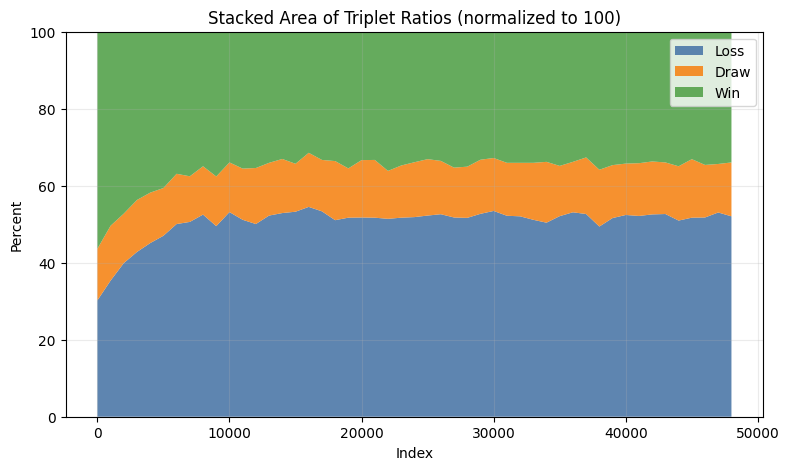

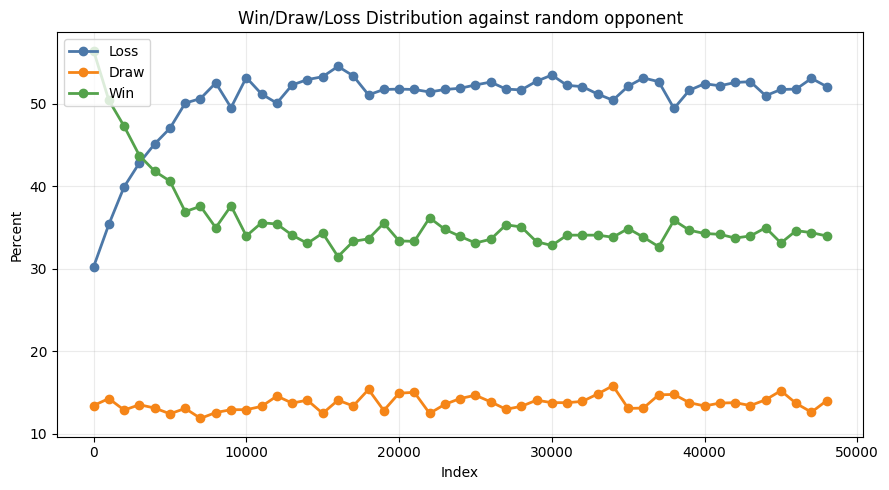

{'oxxxoxoox': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'oxoxxxoox': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'xxooxxxoo': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'oxxxxooox': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'xoxxooxxo': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'xxxxoooox': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'oxxxoooxx': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'xoxooxoxx': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'xxooxoxox': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'ooxxxxxoo': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'xooxxxoxo': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'oxoxxooxx': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'oxxoxxxoo': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'ooxooxxxx': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'ooxoxoxxx': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'oxxxxooxo': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'xoxoxxoxo': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'ooxxoxoxx': 

In [208]:
output = perform_training('o', 'random', 10000, 10, True)
Q_Table_against_perfect_opponent = output[0]
#print(Q_Table_against_perfect_opponent)
result_distribution = output[1]
plot_triplet_ratios(result_distribution, component_labels=("Loss", "Draw", "Win"), normalize=True)
print(Q_Table_against_perfect_opponent)


In [215]:
print(Q_Table_against_perfect_opponent['xxo_o____'])

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [171]:
export_Q_Table(Q_Table_against_perfect_opponent)

TypeError: Object of type ndarray is not JSON serializable